In [40]:
from pathlib import Path

from tira.rest_api_client import Client
from tira.third_party_integrations import get_output_directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

In [3]:
tira = Client()

# loading train data
text_train = tira.pd.inputs(
    "nlpbuw-fsu-sose-24", "authorship-verification-train-20240408-training"
)
targets_train = tira.pd.truths(
    "nlpbuw-fsu-sose-24", "authorship-verification-train-20240408-training"
)
# loading validation data (automatically replaced by test data when run on tira)
text_validation = tira.pd.inputs(
    "nlpbuw-fsu-sose-24", "authorship-verification-validation-20240408-training"
)
targets_validation = tira.pd.truths(
    "nlpbuw-fsu-sose-24", "authorship-verification-validation-20240408-training"
)

Download: 4.88MiB [00:00, 28.9MiB/s]


Download finished. Extract...
Extraction finished:  /root/.tira/extracted_datasets/nlpbuw-fsu-sose-24/authorship-verification-train-20240408-training/


Download: 44.4kiB [00:00, 1.14MiB/s]


Download finished. Extract...
Extraction finished:  /root/.tira/extracted_datasets/nlpbuw-fsu-sose-24/authorship-verification-train-20240408-training/


Download: 561kiB [00:00, 6.08MiB/s]


Download finished. Extract...
Extraction finished:  /root/.tira/extracted_datasets/nlpbuw-fsu-sose-24/authorship-verification-validation-20240408-training/


Download: 5.20kiB [00:00, 9.93MiB/s]

Download finished. Extract...
Extraction finished:  /root/.tira/extracted_datasets/nlpbuw-fsu-sose-24/authorship-verification-validation-20240408-training/


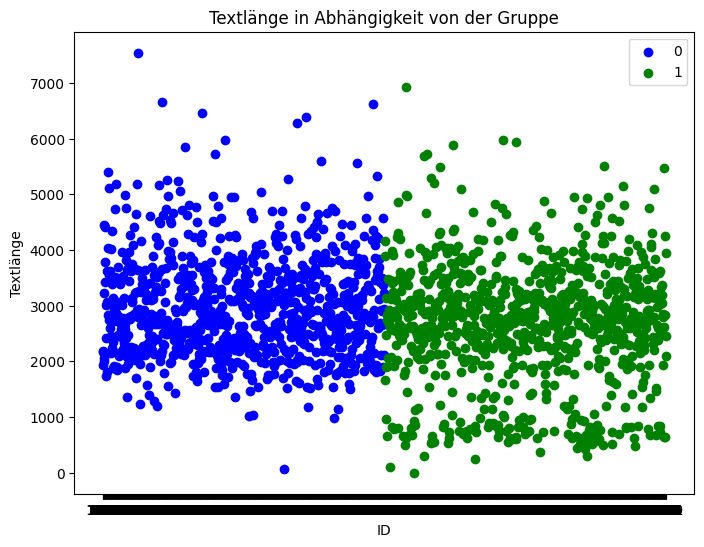

In [39]:
text_train["length"] = text_train["text"].apply(len)

text_merged = pd.merge(text_train, targets_train, on='id')


plt.figure(figsize=(8, 6))

# Gruppen definieren
groups = text_merged['generated'].unique()

# Farben definieren
colors = ['blue', 'green']

# Für jede Gruppe einen Scatterplot erstellen
for idx, group in enumerate(groups):
    group_data = text_merged[text_merged['generated'] == group]
    plt.scatter(group_data['id'], group_data['length'], color=colors[idx], label=group)

# Diagramm beschriften
plt.xlabel('ID')
plt.ylabel('Textlänge')
plt.title('Textlänge in Abhängigkeit von der Gruppe')
plt.legend()

# Diagramm anzeigen
plt.show()

This does not help discriminate the two groups.

In [42]:
frequent_words = ["(t|T)apestry", "transformative", "[T|t]ink of", "[D|d]elve"]

xi = [re.findall(re.compile(word), text) for word in frequent_words for text in text_train["text"]]

In [51]:
for text in text_train["text"]:
    
    print(re.findall("[D|d]elve", text))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['delve']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['delve']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['delve']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[